In [3]:
import numpy as np
from keras.utils import to_categorical


# Load the data

In [35]:
# (x_train, y_train),(x_test,y_test) = cifar10.load_data()

import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_data():
    x_train = []
    y_train = []

    # Iterate through all training batches, and load them in memory.
    for i in range(1, 6):
        path = "cifar-10-batches-py/data_batch_" + str(i)
        d = unpickle(path)
        # Add the training data to our datastructures.
        num_instances = len(d[b'data'])
        for j in range(0, num_instances):
            x_train.append(d[b'data'][j])
            y_train.append(d[b'labels'][j])

    x_test = []
    y_test = []

    # Load the test batch.
    path = "cifar-10-batches-py/test_batch"
    d = unpickle(path)
    # Add the testset to our datastructures.
    num_instances = len(d[b'data'])
    for j in range(0, num_instances):
        x_test.append(d[b'data'][j])
        y_test.append(d[b'labels'][j])

    train_len = len(x_train)
    test_len = len(x_test)

    return (np.stack(x_train).reshape(train_len,3,32,32).transpose((0,2,3,1)), np.stack(y_train)), (np.stack(x_test).reshape(test_len,3,32,32).transpose((0,2,3,1)) , np.stack(y_test))

In [40]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = load_data()

print("Number of training instances: " + str(len(x_train)))
print("Number of test instances: " + str(len(x_test)))


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)


Number of training instances: 50000
Number of test instances: 10000


# Define the Model

In [41]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)
x = Dense(units=200,activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer = Dense(units=10,activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Compile and train the model

In [42]:
from keras.optimizers import Adam

opt = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [43]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8505 - accuracy: 0.3331
Epoch 2/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6722 - accuracy: 0.4034
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5899 - accuracy: 0.4301
Epoch 4/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5358 - accuracy: 0.4539
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5027 - accuracy: 0.4642
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4689 - accuracy: 0.4742
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4396 - accuracy: 0.4879
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4168 - accuracy: 0.4944
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3936 - accuracy: 0.5030
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.373

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4287 - accuracy: 0.4877


[1.4286577701568604, 0.4876999855041504]

In [45]:
CLASSES = np.array(['airplane','automobile','bird','cat','dee','dog','frog','horse','ship','truck'])

In [46]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis=-1)]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]
preds_single.shape

313/313 [==============================] - 1s 2ms/step


(10000,)

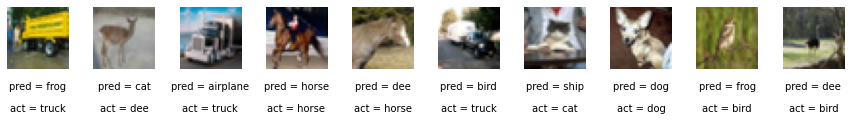

In [47]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)